In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
filmes = pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes.columns = ['filmeId','titulo','genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.columns = ['userId','filmeId','nota','momento']
notas.head()

,userId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
filmes_notas = filmes.merge(notas,how='inner',on='filmeId')
filmes_notas.head()

,filmeId,titulo,genero,userId,nota,momento
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [7]:
filmes_notas['titulo'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

In [8]:
filmes_notas.sample(5) # id 72998	

,filmeId,titulo,genero,userId,nota,momento
65579,5062,Seconds (1966),Mystery|Sci-Fi|Thriller,182,4.0,1077069129
74284,7254,The Butterfly Effect (2004),Drama|Sci-Fi|Thriller,414,4.0,1075733597
33834,1625,"Game, The (1997)",Drama|Mystery|Thriller,570,4.0,1181478692
42983,2391,"Simple Plan, A (1998)",Crime|Drama|Thriller,599,4.0,1498499526
2937,73,"Misérables, Les (1995)",Drama|War,605,3.0,1277094964


In [9]:
filmes_notas.isnull().sum()

filmeId    0
titulo     0
genero     0
userId     0
nota       0
momento    0
dtype: int64

In [10]:
teste = filmes_notas.groupby('titulo')['nota'].mean()
teste.head()

titulo
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: nota, dtype: float64

In [11]:
filmes_notas.shape

(100836, 6)

In [12]:
filmes_notas.dtypes

filmeId      int64
titulo      object
genero      object
userId       int64
nota       float64
momento      int64
dtype: object

In [13]:
filmes_notas.groupby(filmes_notas['titulo'])['nota'].mean()

titulo
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: nota, Length: 9719, dtype: float64

In [14]:
toy_story = filmes_notas[filmes_notas['filmeId'] == 1]
toy_story

,filmeId,titulo,genero,userId,nota,momento
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
210,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,606,2.5,1349082950
211,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,607,4.0,964744033
212,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,608,2.5,1117408267
213,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,609,3.0,847221025


In [15]:
toy_story_mean = '{:.2f}'.format(toy_story.nota.mean())
toy_story_mean = float(toy_story_mean)
toy_story_mean

3.92

In [16]:
toy_story_title = filmes_notas.query('filmeId==1')['titulo'].unique().tolist()
toy_story_title

['Toy Story (1995)']

In [17]:
life_of_pi = filmes_notas[filmes_notas['filmeId'] == 97938]
life_of_pi

,filmeId,titulo,genero,userId,nota,momento
95069,97938,Life of Pi (2012),Adventure|Drama|IMAX,10,1.0,1455398105
95070,97938,Life of Pi (2012),Adventure|Drama|IMAX,15,4.0,1510572473
95071,97938,Life of Pi (2012),Adventure|Drama|IMAX,18,3.0,1455051126
95072,97938,Life of Pi (2012),Adventure|Drama|IMAX,21,3.5,1376823135
95073,97938,Life of Pi (2012),Adventure|Drama|IMAX,47,3.5,1496209606
95074,97938,Life of Pi (2012),Adventure|Drama|IMAX,50,2.0,1514239038
95075,97938,Life of Pi (2012),Adventure|Drama|IMAX,62,4.5,1521489658
95076,97938,Life of Pi (2012),Adventure|Drama|IMAX,98,4.0,1532457941
95077,97938,Life of Pi (2012),Adventure|Drama|IMAX,106,4.5,1467567463
95078,97938,Life of Pi (2012),Adventure|Drama|IMAX,125,4.0,1474495239


In [18]:
life_of_pi_mean = '{:.2f}'.format(life_of_pi.nota.mean())
life_of_pi_mean = float(life_of_pi_mean)
life_of_pi_mean

3.63

In [19]:
life_of_pi_title = filmes_notas.query('filmeId==97938')['titulo'].unique().tolist()
life_of_pi_title

['Life of Pi (2012)']

In [20]:
moneyball = filmes_notas[filmes_notas['filmeId'] == 89492]
moneyball

,filmeId,titulo,genero,userId,nota,momento
93381,89492,Moneyball (2011),Drama,62,4.0,1521489573
93382,89492,Moneyball (2011),Drama,68,4.5,1321936093
93383,89492,Moneyball (2011),Drama,70,4.5,1355185210
93384,89492,Moneyball (2011),Drama,73,4.0,1464282937
93385,89492,Moneyball (2011),Drama,103,4.0,1431955333
93386,89492,Moneyball (2011),Drama,105,3.5,1446572244
93387,89492,Moneyball (2011),Drama,152,4.0,1450867862
93388,89492,Moneyball (2011),Drama,177,4.0,1435526646
93389,89492,Moneyball (2011),Drama,249,4.0,1346758113
93390,89492,Moneyball (2011),Drama,292,3.0,1326661225


In [21]:
moneyball_mean = '{:.2f}'.format(moneyball.nota.mean())
moneyball_mean = float(moneyball_mean)
moneyball_mean

3.88

In [22]:
moneyball_title = filmes_notas.query('filmeId==89492')['titulo'].unique().tolist()
moneyball_title

['Moneyball (2011)']

In [23]:
titulos_bons = toy_story_title + life_of_pi_title + moneyball_title
d = {'Titulo': titulos_bons, 'Notas':[toy_story_mean,life_of_pi_mean,moneyball_mean]}
filmes_bons = pd.DataFrame(data =d)
filmes_bons

,Titulo,Notas
0,Toy Story (1995),3.92
1,Life of Pi (2012),3.63
2,Moneyball (2011),3.88


In [24]:
spider_man_2002 = filmes_notas[filmes_notas['filmeId'] == 5349]
spider_man_2002

,filmeId,titulo,genero,userId,nota,momento
66530,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,7,3.5,1106636606
66531,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,18,4.0,1456923908
66532,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,20,3.0,1054037241
66533,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,21,3.0,1441826946
66534,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,28,3.5,1234515706
...,...,...,...,...,...,...
66647,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,599,3.5,1498501062
66648,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,600,3.5,1237715185
66649,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,606,4.0,1171408549
66650,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,608,3.0,1117408260


In [25]:
spider_man_2002_mean = '{:.2f}'.format(spider_man_2002.nota.mean())
spider_man_2002_mean = float(spider_man_2002_mean)
spider_man_2002_mean

3.54

In [26]:
spider_man_2002_title = filmes_notas.query('filmeId==5349')['titulo'].unique().tolist()
spider_man_2002_title

['Spider-Man (2002)']

In [27]:
persia = filmes_notas[filmes_notas['filmeId'] == 78105]
persia

,filmeId,titulo,genero,userId,nota,momento
91141,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,62,3.5,1523788888
91142,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,233,1.5,1533005197
91143,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,249,3.0,1356549977
91144,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,318,2.5,1434395066
91145,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,380,4.0,1493420838
91146,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,381,3.0,1278632715
91147,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,448,1.0,1310497290
91148,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,464,2.5,1325590568
91149,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,509,4.0,1435996118
91150,78105,Prince of Persia: The Sands of Time (2010),Action|Adventure|Fantasy|Romance|IMAX,556,4.0,1534321036


In [28]:
persia_mean = '{:.2f}'.format(persia.nota.mean())
persia_mean = float(persia_mean)
persia_mean

2.88

In [29]:
persia_title = filmes_notas.query('filmeId==78105')['titulo'].unique().tolist()
persia_title

['Prince of Persia: The Sands of Time (2010)']

In [30]:
rogue_one = filmes_notas[filmes_notas['filmeId'] == 166528]
rogue_one

,filmeId,titulo,genero,userId,nota,momento
100200,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,15,5.0,1510572789
100201,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,62,4.5,1521489964
100202,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,68,4.5,1526947652
100203,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,125,3.0,1485508572
100204,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,210,4.5,1527266080
100205,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,212,4.0,1523216799
100206,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,248,3.0,1534591681
100207,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,249,5.0,1484239767
100208,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,252,3.5,1498284126
100209,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,279,3.5,1506395297


In [31]:
rogue_one_mean = '{:.2f}'.format(rogue_one.nota.mean())
rogue_one_mean = float(rogue_one_mean)
rogue_one_mean

3.93

In [32]:
rogue_one_title = filmes_notas.query('filmeId==166528')['titulo'].unique().tolist()
rogue_one_title

['Rogue One: A Star Wars Story (2016)']

In [33]:
hangover = filmes_notas[filmes_notas['filmeId'] == 102686]
hangover

,filmeId,titulo,genero,userId,nota,momento
95655,102686,"Hangover Part III, The (2013)",Comedy,89,3.5,1520408925
95656,102686,"Hangover Part III, The (2013)",Comedy,111,3.5,1516154009
95657,102686,"Hangover Part III, The (2013)",Comedy,222,3.5,1391347209
95658,102686,"Hangover Part III, The (2013)",Comedy,249,3.5,1379286477
95659,102686,"Hangover Part III, The (2013)",Comedy,365,4.5,1488673349
95660,102686,"Hangover Part III, The (2013)",Comedy,448,2.5,1386235249
95661,102686,"Hangover Part III, The (2013)",Comedy,495,3.0,1458636983
95662,102686,"Hangover Part III, The (2013)",Comedy,534,3.0,1459787998


In [34]:
hangover_mean = '{:.2f}'.format(hangover.nota.mean())
hangover_mean = float(hangover_mean)
hangover_mean

3.38

In [35]:
hangover_title = filmes_notas.query('filmeId==102686')['titulo'].unique().tolist()
hangover_title

['Hangover Part III, The (2013)']

In [36]:
lista_ruim = hangover_title + rogue_one_title + persia_title
di = {'Titulo': lista_ruim, 'Notas':[hangover_mean,rogue_one_mean,persia_mean]}
filmes_ruins = pd.DataFrame(data=di)
filmes_ruins

,Titulo,Notas
0,"Hangover Part III, The (2013)",3.38
1,Rogue One: A Star Wars Story (2016),3.93
2,Prince of Persia: The Sands of Time (2010),2.88


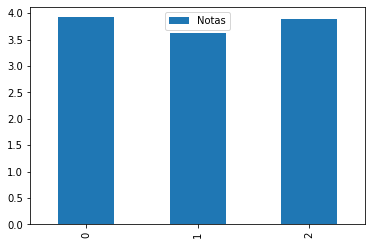

In [37]:
filmes_bons.plot(kind='bar')

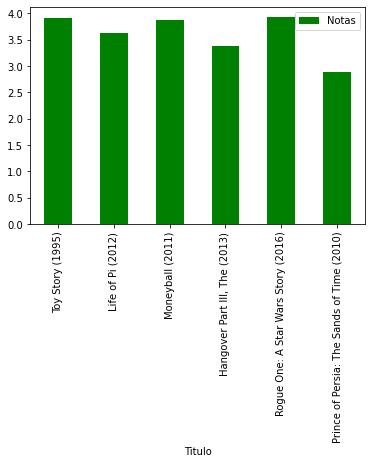

In [38]:
dados = pd.concat([filmes_bons , filmes_ruins])
dados.plot.bar(x = "Titulo",y='Notas',color=['green']);
#sns.catplot(x = "Titulo",y='Notas', data = dados, kind="bar")

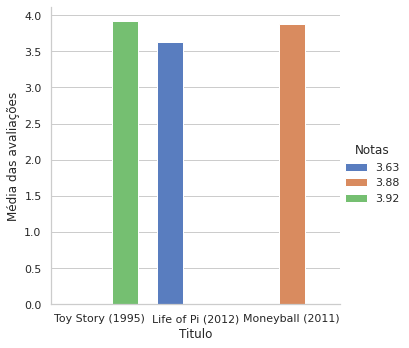

In [39]:
sns.set(style="whitegrid")
g = sns.catplot(x="Titulo", y="Notas", hue='Notas', data=filmes_bons, kind="bar", palette="muted")
g.set_ylabels("Média das avaliações")

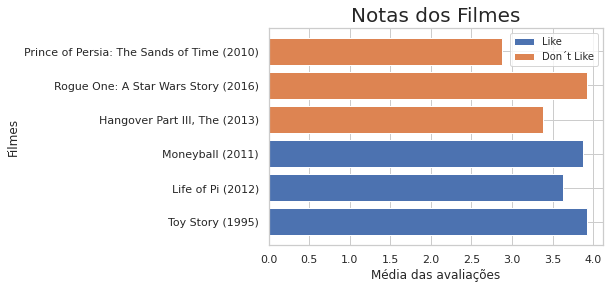

In [40]:
plt.barh(filmes_bons['Titulo'],filmes_bons['Notas'],label='Like') 
plt.barh(filmes_ruins['Titulo'],filmes_ruins['Notas'],label='Don´t Like') 
plt.xlabel('Média das avaliações')
plt.ylabel('Filmes')
plt.title("Notas dos Filmes",fontsize=20)
plt.legend(fontsize=10);
plt.savefig("grafico1.png", bbox_inches='tight',pad_inches=0.1)